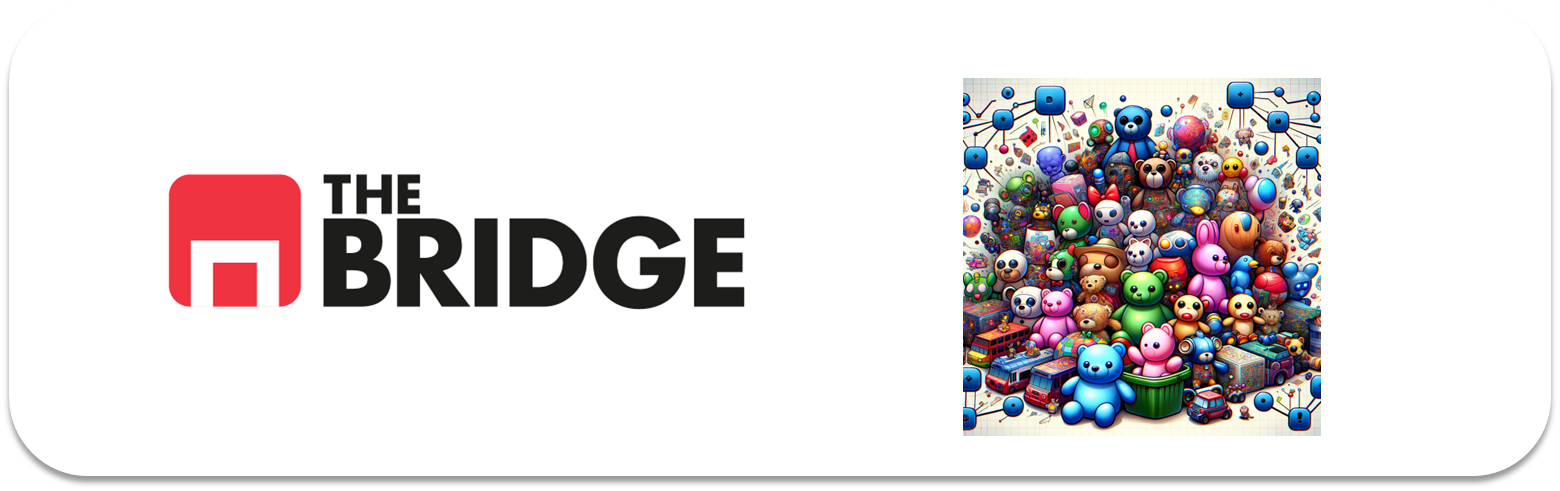

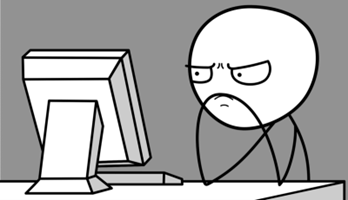

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


### Entendimiento del problema:

 Objetivo -> dividir mezclas de bebidas según sus componentes químicos


 Algoritmos:

 -DBSCAN

 -K-means (ya que sabemos que la segmentación debe ser entre 3-5 grupos)

In [5]:
# Cargamos y visualizamos los datos

df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_13/Unidad_02/Practica_Obligatoria/data/empowering_drinks.csv", sep="|")

df.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [7]:
df.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


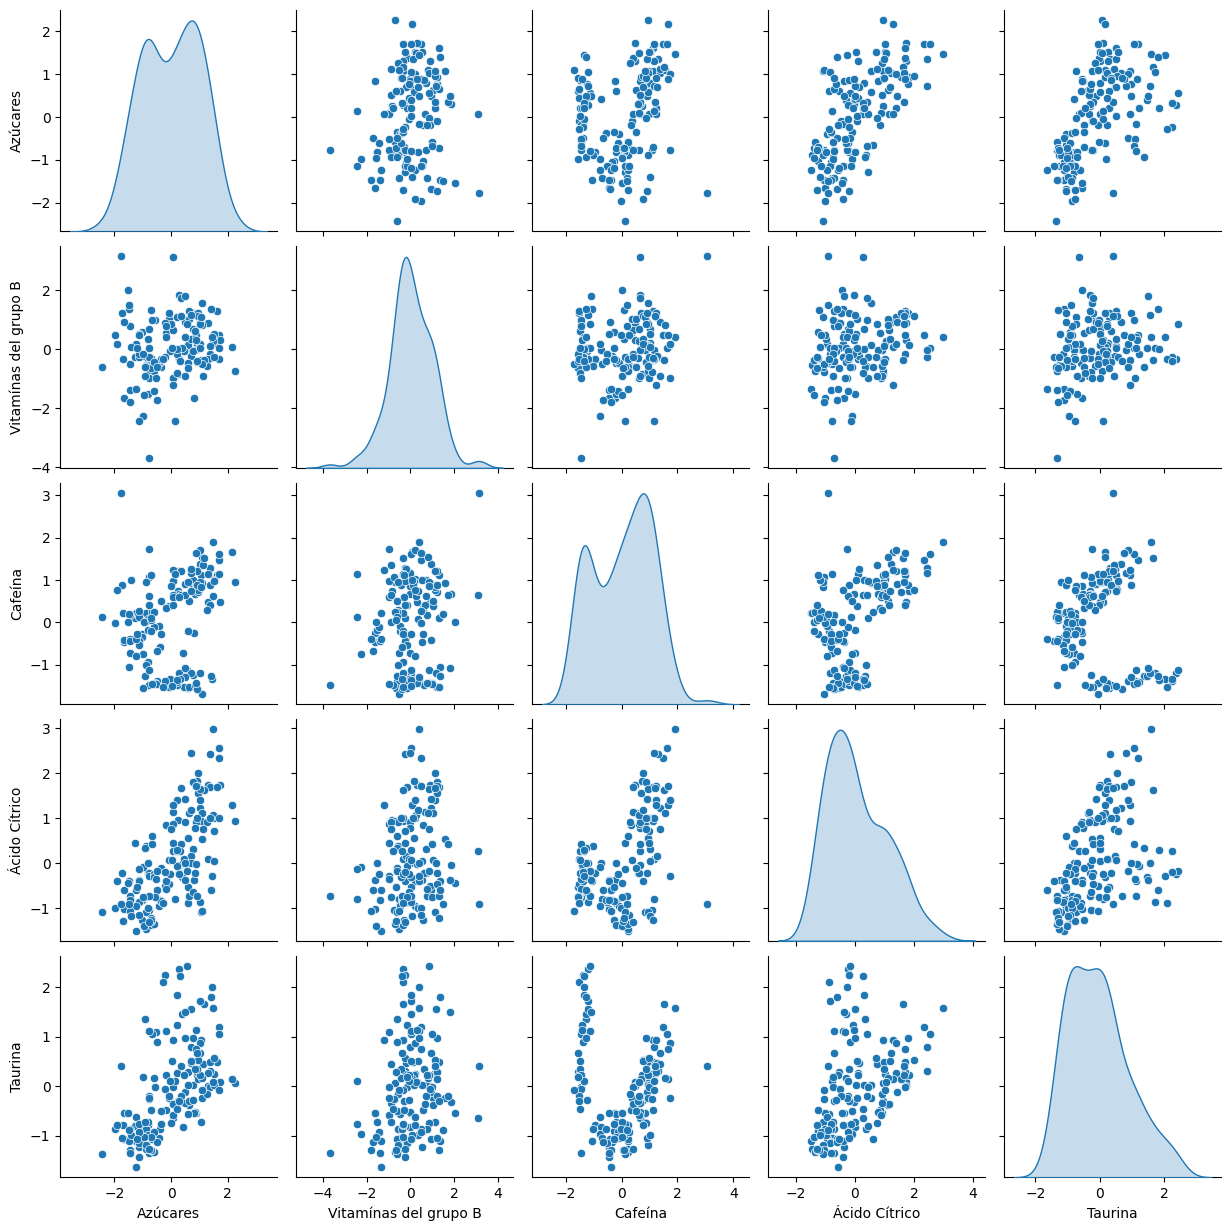

In [10]:
# Mini EDA
sns.pairplot(df, diag_kind="kde")
plt.show()

Se puede observar algunas posibles correlaciones

-Azúcares y taurina o azúcares y ácido cítrico

-Taurina y ácido cítrico

Pero no se ve separaciones evidentes en general, solo en cafeina/taurina.

In [12]:
# Tratamiento de features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [16]:
# Comprobamos que están normalizados los datos
df.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


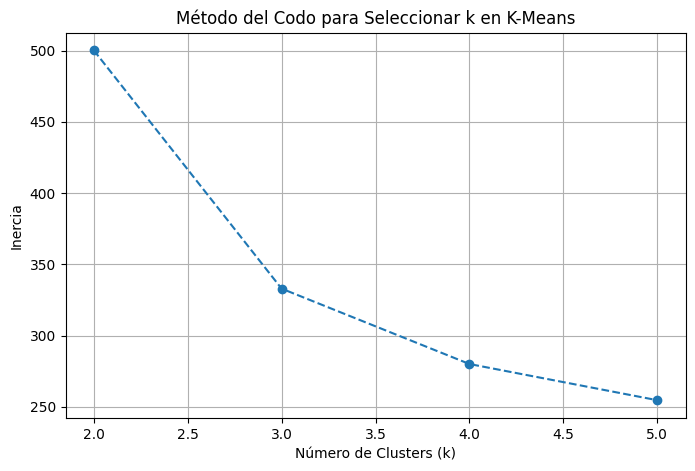

In [18]:
#MODELOS
#K-Means

inertia = []
k_range = range(2, 6)  # de 2 a 5 clusters, según la recomendación del enunciado

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Seleccionar k en K-Means')
plt.grid()
plt.show()

Podemos ver que para K=4 la inercia disminuye bastante lo que sugiere que este valor podria ser el más adecuado, además de estar dentro de las recomendaciones del enunciado.

/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_7984/3124204853.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_scaled["Cluster_KMeans"], palette="viridis")


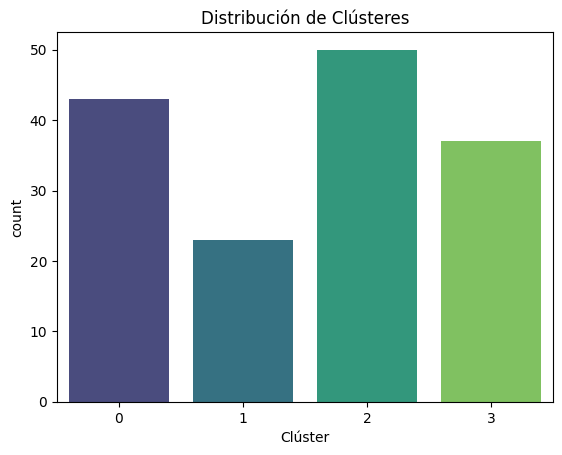

In [23]:
# Aplicamos K-Means con k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_scaled["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)

sns.countplot(x=df_scaled["Cluster_KMeans"], palette="viridis")
plt.title("Distribución de Clústeres")
plt.xlabel("Clúster")
plt.show()

In [60]:
df_scaled["Cluster_KMeans"].unique()

array([2, 1, 0, 3], dtype=int32)

/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_7984/4098050876.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_scaled["Cluster_DBSCAN"], palette="viridis")


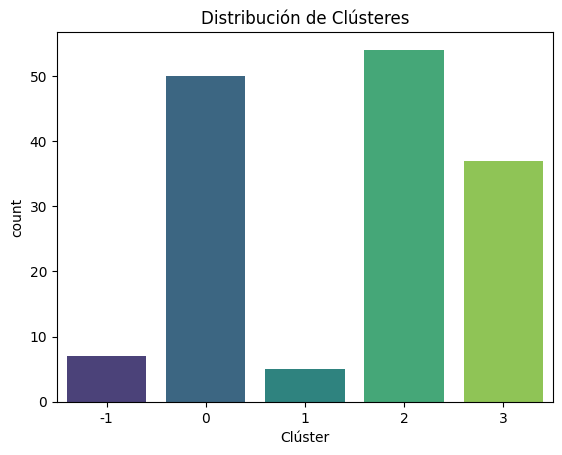

In [26]:
#DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
df_scaled["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)


sns.countplot(x=df_scaled["Cluster_DBSCAN"], palette="viridis")
plt.title("Distribución de Clústeres")
plt.xlabel("Clúster")
plt.show()

In [27]:
# Probamos diferentes valores de epsilon (eps) para DBSCAN
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 7]

results = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled.iloc[:, :-2])  
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0) 
        results[(eps, min_samples)] = num_clusters


results_df = pd.DataFrame(results.items(), columns=["(eps, min_samples)", "Num_Clusters"])

results_df


,"(eps, min_samples)",Num_Clusters
0,"(0.5, 3)",8
1,"(0.5, 5)",0
2,"(0.5, 7)",0
3,"(1.0, 3)",4
4,"(1.0, 5)",3
5,"(1.0, 7)",3
6,"(1.5, 3)",1
7,"(1.5, 5)",1
8,"(1.5, 7)",1
9,"(2.0, 3)",1


Para eps=1 y min_samples=3 obtenemos 4 clusters que está dentro de la recomendación

In [28]:
# Aplicamos DBSCAN con los parámetros ajustados (eps=1.0, min_samples=3)
dbscan_final = DBSCAN(eps=1.0, min_samples=3)
df_scaled["Cluster_DBSCAN"] = dbscan_final.fit_predict(df_scaled.iloc[:, :-2]) 

df_scaled



,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Cluster_KMeans,Cluster_DBSCAN
0,1.465925,0.196207,0.957824,0.927289,0.317612,2,0
1,0.221992,-0.871612,0.667526,0.879813,-0.267608,2,0
2,0.173684,1.079919,1.132002,1.307094,0.336190,2,0
3,1.635003,0.453956,1.373917,2.240782,1.320844,2,0
4,0.270301,1.816346,0.599790,-0.117176,-0.295475,1,0
...,...,...,...,...,...,...,...
148,0.463533,0.380314,-1.277470,-0.069700,1.088614,3,2
149,0.306532,-0.429756,-1.335530,0.199329,2.435547,3,2
150,0.185761,-0.024721,-1.345206,0.215154,2.017534,3,2
151,1.345155,1.337669,-1.267793,-0.671058,1.971088,3,3


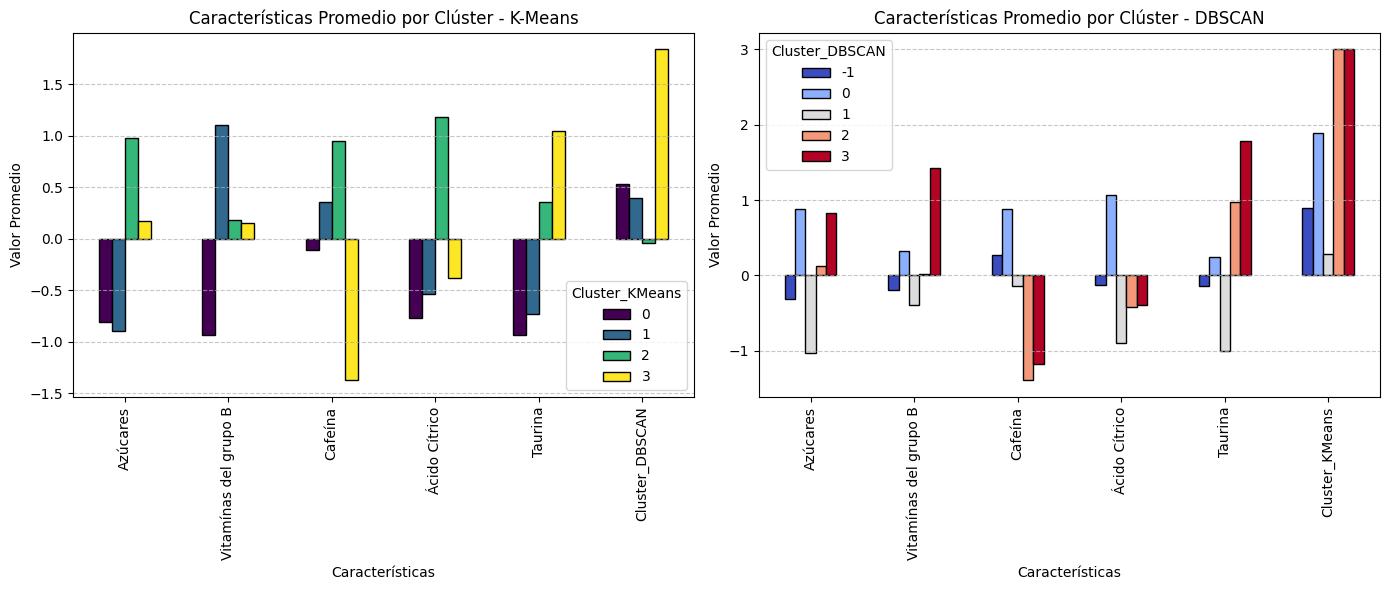

In [30]:
# Calcular los valores medios de las características para cada clúster en ambos métodos
cluster_means_kmeans = df_scaled.groupby("Cluster_KMeans").mean()
cluster_means_dbscan = df_scaled.groupby("Cluster_DBSCAN").mean()

# Visualizar comparativamente las características de cada clúster
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# K-Means
cluster_means_kmeans.T.plot(kind="bar", ax=ax[0], colormap="viridis", edgecolor="black")
ax[0].set_title("Características Promedio por Clúster - K-Means")
ax[0].set_xlabel("Características")
ax[0].set_ylabel("Valor Promedio")
ax[0].grid(axis="y", linestyle="--", alpha=0.7)

# DBSCAN
cluster_means_dbscan.T.plot(kind="bar", ax=ax[1], colormap="coolwarm", edgecolor="black")
ax[1].set_title("Características Promedio por Clúster - DBSCAN")
ax[1].set_xlabel("Características")
ax[1].set_ylabel("Valor Promedio")
ax[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

#### KMEANS - Resultados

Clúster 0: Bajo en casi todo, con moderada cafeina. Sugiere algo parecido a un café

Clúster 1: Valores bajos en todos los componentes, menos en vitaminas, por lo que podría ser algo más beneficioso para la salud.

Clúster 2: Altos niveles en casi todas las características, especialmente en Cafeína y Ácido Cítrico. Probablemente bebidas con efecto energético más fuerte.

Clúster 3: Alto en Vitaminas B y y azúcares. Sugiere un zumo.

### DBSCAN

El cluster -1 significa ruido

Cluster 0 parecido al cluster 2 de KMEANS
Cluster 1 parecido al cluster 0 de KMEANS
Cluster 2 parecido al cluster 3 de KMEANS
Cluster 3 parecido al cluster 2 pero con más taurina, vitainas y azúcares, por lo que se puede tratar de una bebida mucho más fuerte.


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [32]:
df_new = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_13/Unidad_02/Practica_Obligatoria/data/new_experiments.csv" , sep="|")

df_new.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583


/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_7984/1900458717.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_new_scaled["Cluster_KMeans"], palette="viridis")


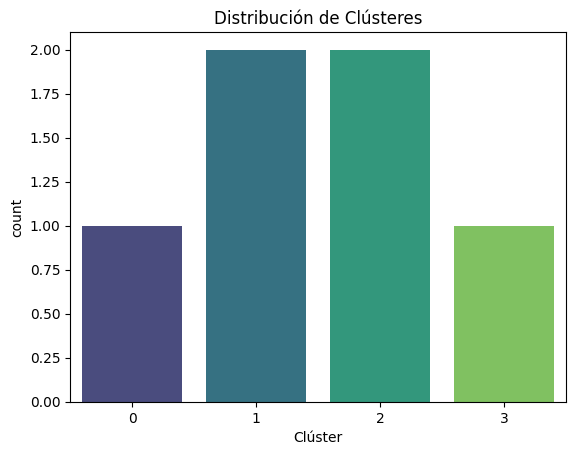

In [44]:
new_df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_13/Unidad_02/Practica_Obligatoria/data/new_experiments.csv", sep="|")

# Tratamiento de features
scaler = StandardScaler()
df_new_scaled = pd.DataFrame(scaler.fit_transform(df), columns=new_df.columns)

# Aplicamos K-Means con k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_new_scaled["Cluster_KMeans"] = kmeans.fit_predict(df_new_scaled)

sns.countplot(x=df_new_scaled["Cluster_KMeans"], palette="viridis")
plt.title("Distribución de Clústeres")
plt.xlabel("Clúster")
plt.show()


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.

In [51]:
power_results_df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_13/Unidad_02/Practica_Obligatoria/data/power_results.csv", header=None, names=["Energización"])

power_results_df.head()


,Energización
0,class
1,1
2,1
3,1
4,1


In [52]:
power_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Energización  160 non-null    object
dtypes: object(1)
memory usage: 1.4+ KB


In [53]:
# Eliminamos la primera fila si contiene el texto "class"
if power_results_df.iloc[0, 0] == "class":
    power_results_df = power_results_df.iloc[1:].reset_index(drop=True)

# Convertimos a tipo numérico
power_results_df = power_results_df.astype(int)

# Verificamos la distribución de los valores de energización
power_results_df["Energización"].value_counts()


Energización
2    62
1    58
3    39
Name: count, dtype: int64

In [57]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


num_samples = len(df_scaled) 
power_results_df = power_results_df.iloc[:num_samples] 

kmeans_labels = df_scaled["Cluster_KMeans"]

# Calcular métricas de evaluación
ari_score = adjusted_rand_score(power_results_df["Energización"], kmeans_labels)
nmi_score = normalized_mutual_info_score(power_results_df["Energización"], kmeans_labels)

ari_score, nmi_score


(0.7584657788023408, 0.7975782591993223)

Podemos ver que los resultados son cercanos a 1 por lo que los clusters predice buena agrupacion